<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/Project_mushroom_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
data = pd.read_csv('/content/mushrooms.csv')

In [3]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


EDA

In [4]:
data['class'].value_counts(normalize=True)

e    0.517971
p    0.482029
Name: class, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


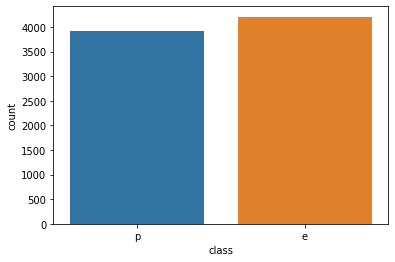

In [5]:
sns.countplot(data['class'])

Just to check whether there is a class imbalance in labelling

<Figure size 864x576 with 0 Axes>

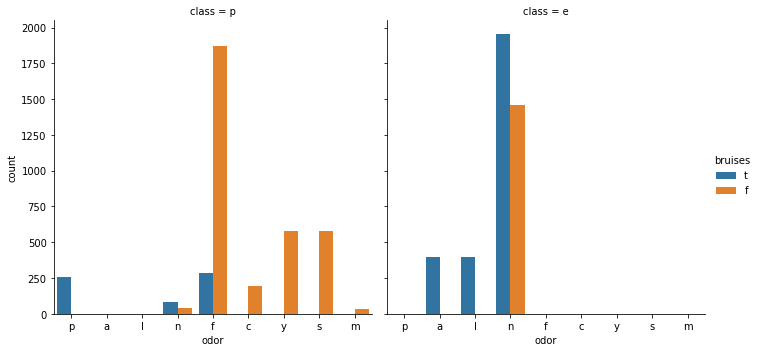

In [6]:
plt.figure(figsize=(12,8))
cp1 = sns.catplot(x='odor',hue='bruises',col='class',data=data, kind='count')

Inference - Mushrooms with foul odor might be poisonous.
Roughly we can say that bruised mushrooms with almond and anise odor are more likely to be edible.
odor-m has less significance in distinguishing between Poisonous and edible.



In [7]:
data['odor'].value_counts()

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

<Figure size 1008x576 with 0 Axes>

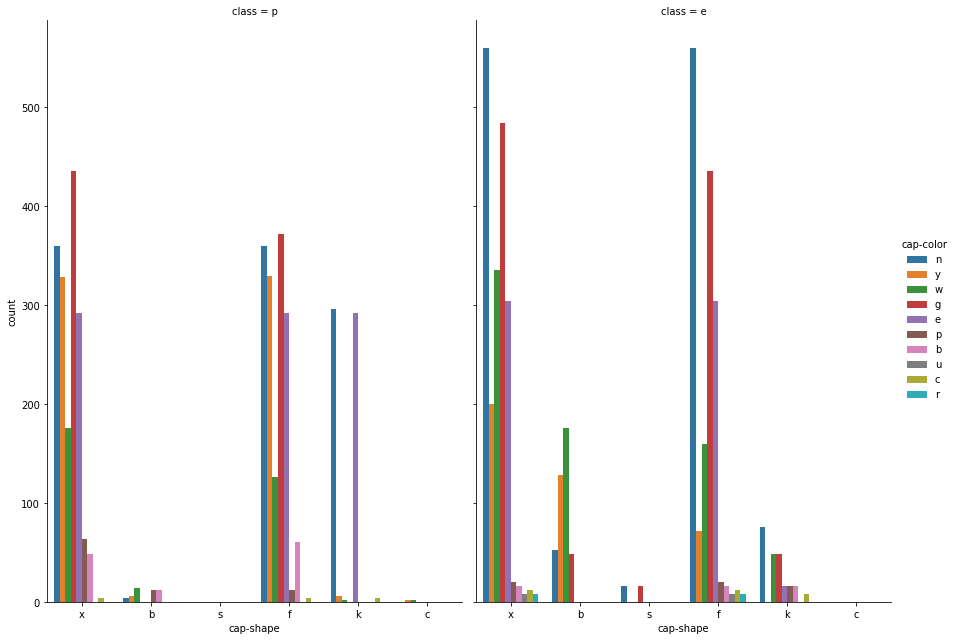

In [8]:
plt.figure(figsize=(14,8))
cp2 = sns.catplot(x='cap-shape', hue='cap-color',data=data, kind='count', col='class', aspect=0.7, height=9)

One of the inferences could be that the majority of red colored and knobbed shape mushrooms might be poisonous.

The white and bell shaped mushrooms might be edible.



<Figure size 864x576 with 0 Axes>

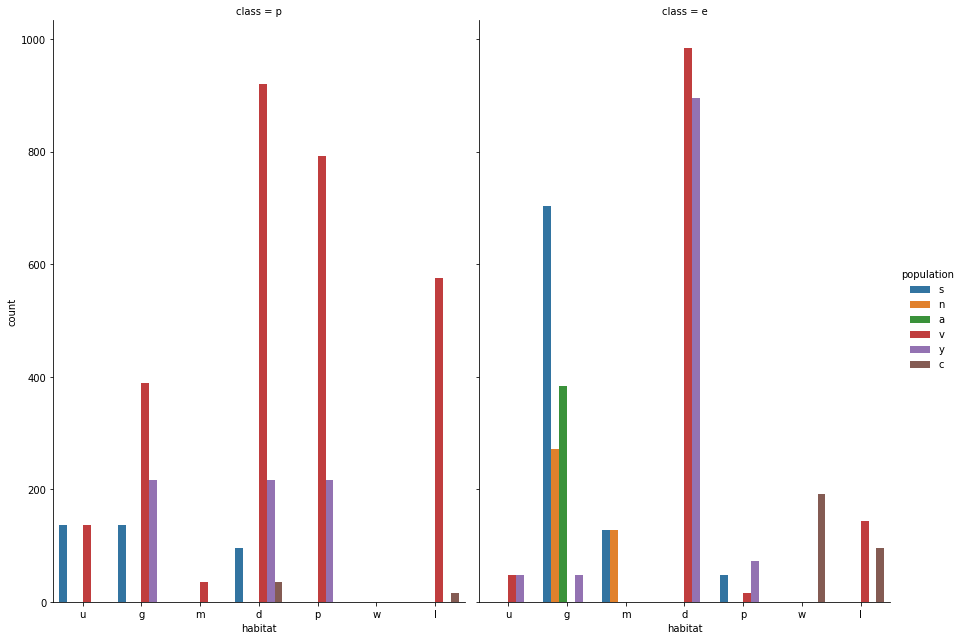

In [9]:
plt.figure(figsize=(12,8))
cp3 = sns.catplot(x='habitat',hue='population',col='class',data=data, kind='count',height=9, aspect=0.7)

One of the inferences could be that the mushrooms which grow on waste dumping areas with clustered population might be edible.

<Figure size 864x576 with 0 Axes>

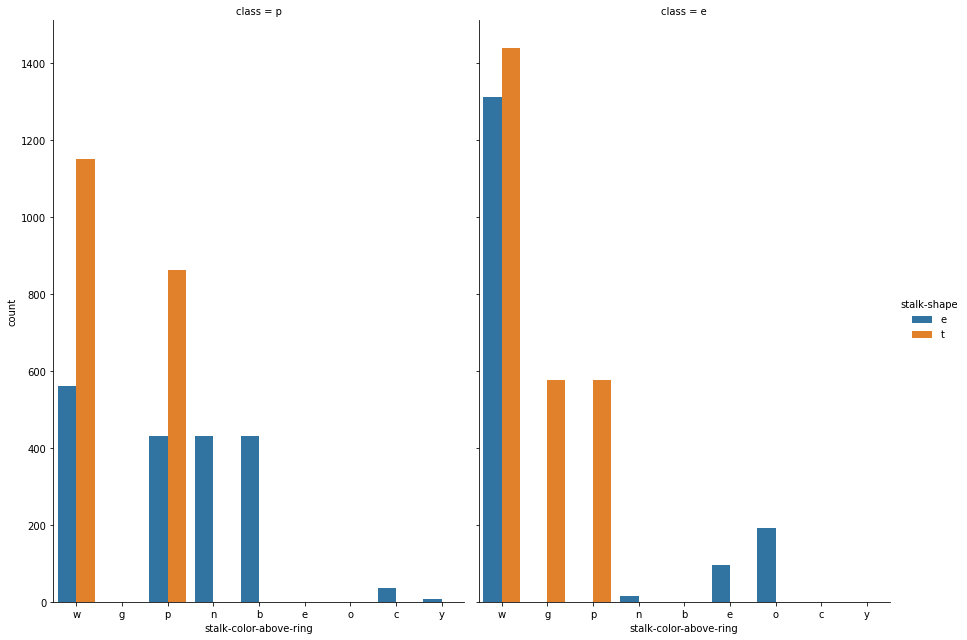

In [10]:
plt.figure(figsize=(12,8))
cp4 = sns.catplot(x='stalk-color-above-ring',hue='stalk-shape', data=data, kind='count',col='class',height=9, aspect=0.7)

One of the inferences could be that the mushrooms with orange color stalk above ring with enlarged stalk shape might be edible. 

<Figure size 864x576 with 0 Axes>

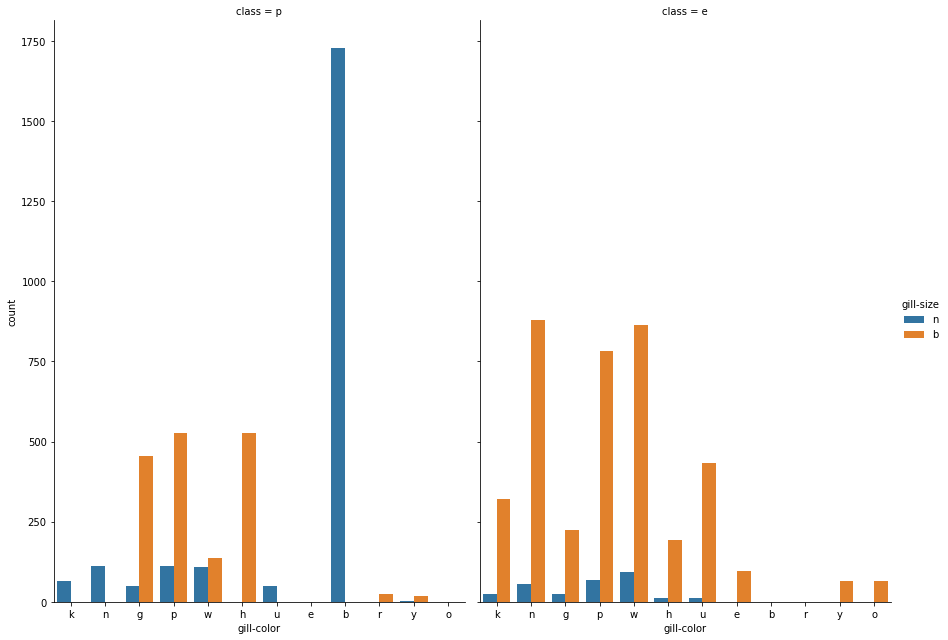

In [11]:
plt.figure(figsize=(12,8))
cp5 = sns.catplot(x='gill-color',hue='gill-size', data=data, kind='count',col='class',height=9, aspect=0.7)

One of the inference - The narrow gill sized and buff gill colored mushrooms might be poisonous.

<Figure size 864x576 with 0 Axes>

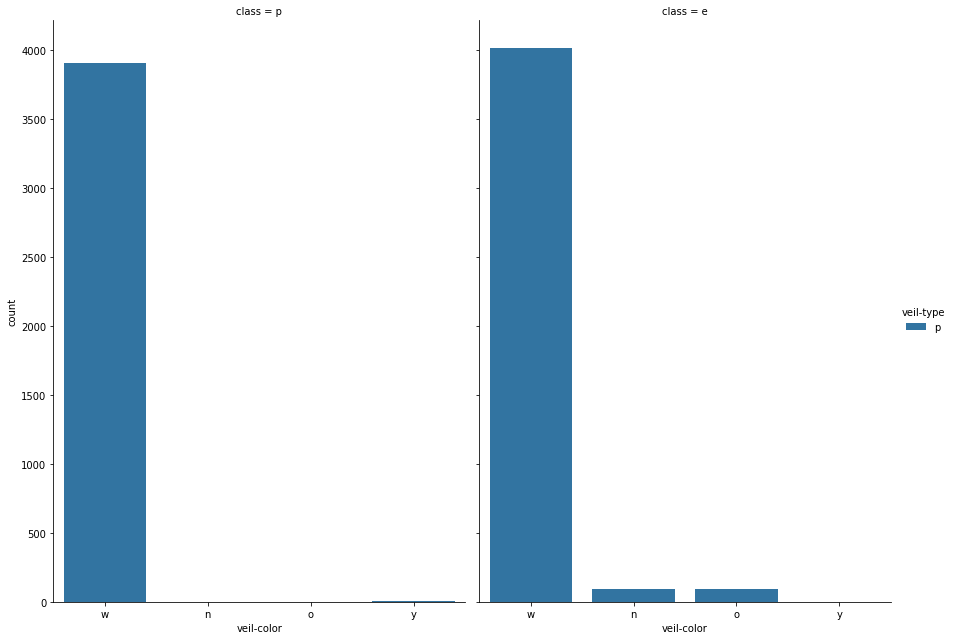

In [12]:
plt.figure(figsize=(12,8))
cp5 = sns.catplot(x='veil-color',hue='veil-type', data=data, kind='count',col='class',height=9, aspect=0.7)

One of the inferences - It's hard to distinguish between poisonous and edible mushrooms only by considering white veil colored partial veil type mushrooms.

<Figure size 864x576 with 0 Axes>

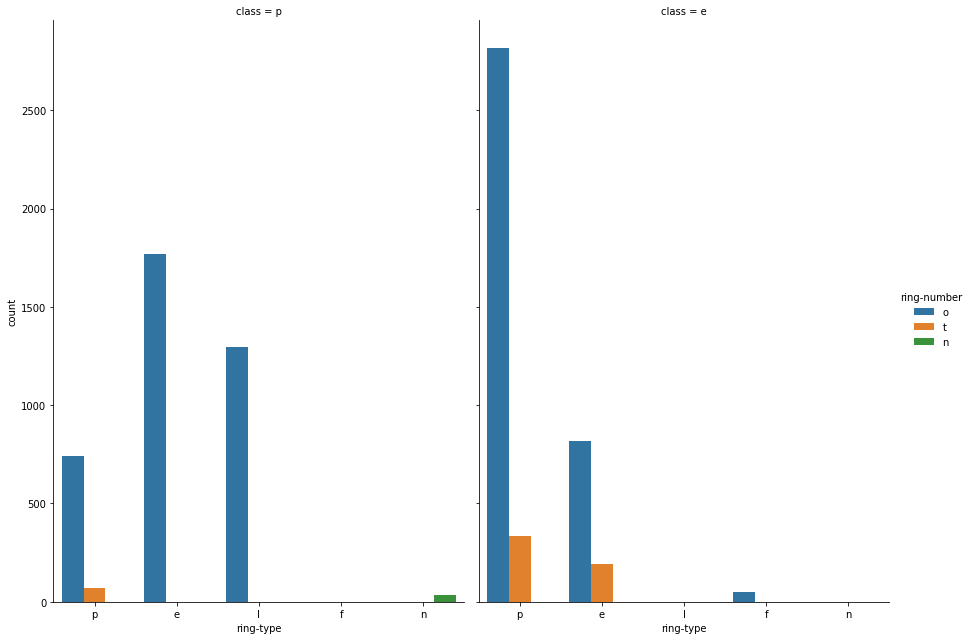

In [13]:
plt.figure(figsize=(12,8))
cp6 = sns.catplot(x='ring-type',hue='ring-number', data=data, kind='count',col='class',height=9, aspect=0.7)

The large ring type mushrooms with one ring number might be poisonous.

<Figure size 864x576 with 0 Axes>

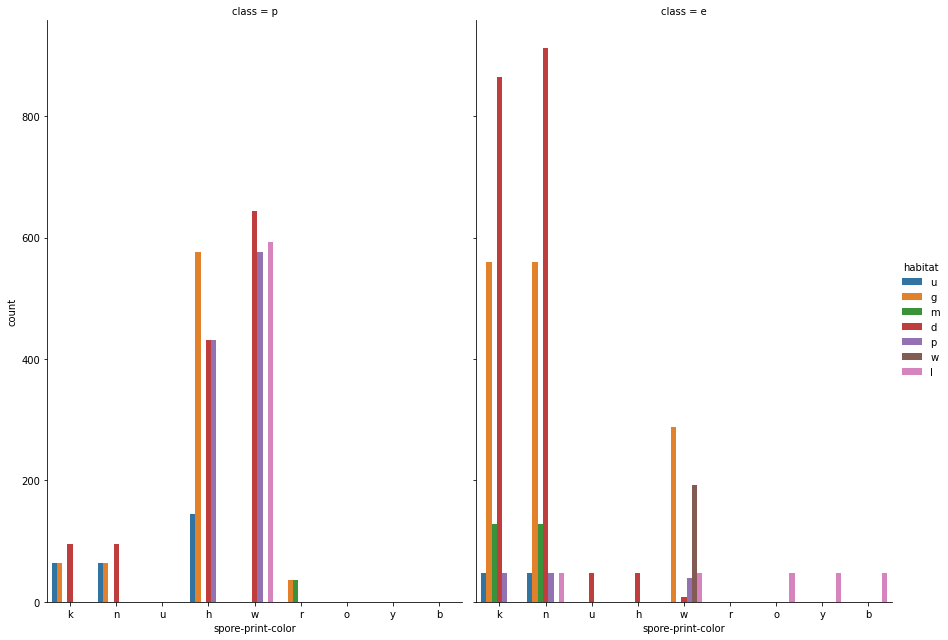

In [14]:
plt.figure(figsize=(12,8))
cp7 = sns.catplot(x='spore-print-color',hue='habitat', data=data, kind='count',col='class',height=9, aspect=0.7)

Inferences: The mushrooms which grow on leaves with spore print colors orange, yellow and buff might be classified as edible.

<Figure size 864x576 with 0 Axes>

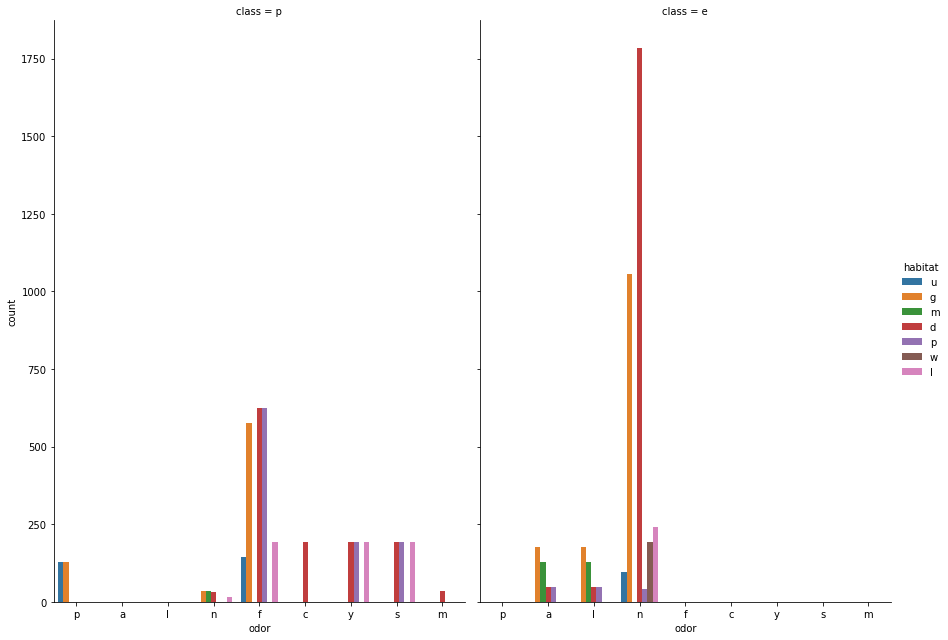

In [15]:
plt.figure(figsize=(12,8))
cp8 = sns.catplot(x='odor',hue='habitat',col='class',kind='count',data=data, aspect=0.7, height=9)

We can tell that the mushrooms with foul, fishy, creosote, spicy and musty odor are poisonous as they are not found in the given habitats.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


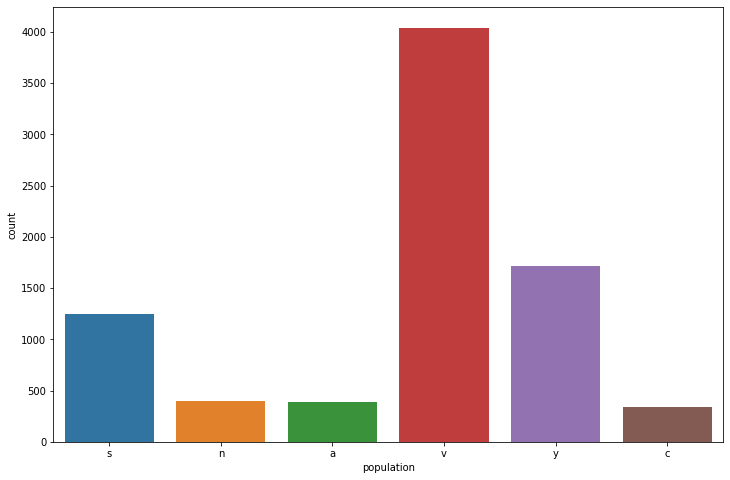

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(data['population'])

In [17]:
data.shape

(8124, 23)

In [18]:
data['stalk-color-above-ring'].value_counts()

w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: stalk-color-above-ring, dtype: int64

In [19]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [21]:
data[data.duplicated()]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [22]:
data.drop_duplicates()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [23]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [26]:
data1 = data.iloc[:,1:12]
data2 = data.iloc[:,12:23]

In [27]:
data1

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root
0,x,s,n,t,p,f,c,n,k,e,e
1,x,s,y,t,a,f,c,b,k,e,c
2,b,s,w,t,l,f,c,b,n,e,c
3,x,y,w,t,p,f,c,n,n,e,e
4,x,s,g,f,n,f,w,b,k,t,e
...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,?
8120,x,s,n,f,n,a,c,b,y,e,?
8121,f,s,n,f,n,a,c,b,n,e,?
8122,k,y,n,f,y,f,c,n,b,t,?


In [28]:
data2

,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,s,s,w,w,p,w,o,p,k,s,u
1,s,s,w,w,p,w,o,p,n,n,g
2,s,s,w,w,p,w,o,p,n,n,m
3,s,s,w,w,p,w,o,p,k,s,u
4,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...
8119,s,s,o,o,p,o,o,p,b,c,l
8120,s,s,o,o,p,n,o,p,b,v,l
8121,s,s,o,o,p,o,o,p,b,c,l
8122,s,k,w,w,p,w,o,e,w,v,l


In [29]:
data1['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [30]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [31]:
cate_variables = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [32]:
len(cate_variables)

22

In [33]:
data_c = data.copy()

In [34]:
data_c

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [35]:
data_c.columns[16]

'veil-type'

In [36]:
label_encoder = LabelEncoder()

In [37]:
for i in cate_variables:
  data_c[i] = label_encoder.fit_transform(data_c[i])

In [38]:
data_c

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,e,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,e,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,p,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,e,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,e,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,e,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,p,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


Changing the class column values p = poisonous to 0 and e = edible to 1.

In [39]:
data_c['class'] = np.where(data_c['class']== 'e' , 1, 0)

In [40]:
data_c

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,1,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,1,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,0,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,1,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,1,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,1,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,0,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [41]:
data_c['stalk-root'].value_counts()

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-root, dtype: int64

Feature selection to select the best features to avoid overfitting.


In [42]:
X = np.array(data_c.drop('class',axis=1))
Y = np.array(data_c['class'])

In [43]:
X

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]])

In [44]:
Y

array([0, 1, 1, ..., 1, 0, 1])

In [45]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2


In [46]:
imp = mutual_info_classif(X,Y)
imp
len(imp)

22

In [47]:
data_c.columns[1:]

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

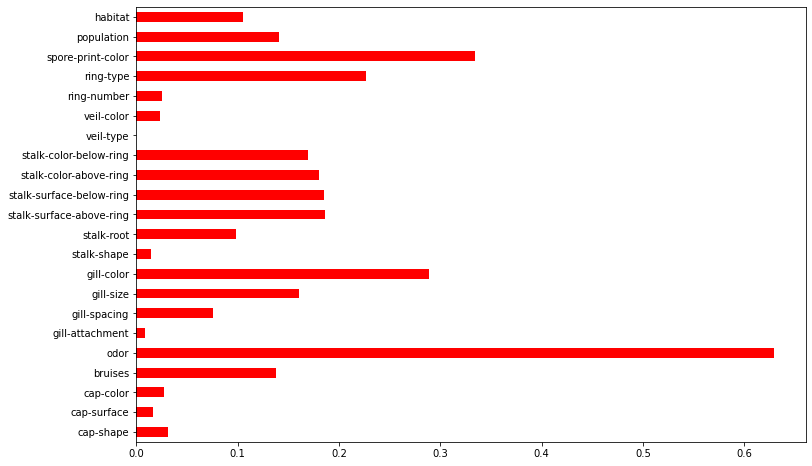

In [48]:
feature_imp = pd.Series(imp, data_c.columns[1:])
plt.figure(figsize=(12,8))
feature_imp.plot(kind='barh', color='red')

In [49]:
feature_df = pd.DataFrame(feature_imp, columns=['fea_score'])
feature_df

,fea_score
cap-shape,0.031247
cap-surface,0.016654
cap-color,0.027542
bruises,0.137871
odor,0.629152
gill-attachment,0.008533
gill-spacing,0.075516
gill-size,0.160372
gill-color,0.288780
stalk-shape,0.014395


In [50]:
feature_df[feature_df['fea_score']>0.06]

,fea_score
bruises,0.137871
odor,0.629152
gill-spacing,0.075516
gill-size,0.160372
gill-color,0.288780
stalk-root,0.098284
stalk-surface-above-ring,0.186051
stalk-surface-below-ring,0.185594
stalk-color-above-ring,0.180439
stalk-color-below-ring,0.169132


In [51]:
feature_multi = feature_df.sort_values('fea_score',ascending=False).iloc[0:14,:]

In [52]:
feature_multi.reset_index(inplace=True)

In [53]:
feature_multi.rename({'index':'features'},axis=1,inplace=True)

In [54]:
from sklearn.feature_selection import chi2

In [55]:
fs = SelectKBest(score_func=chi2, k=14 )

In [56]:
best_fs = fs.fit_transform(X,Y)

In [57]:
fs.scores_

array([1.75083640e+01, 2.14068544e+02, 1.15113816e+01, 1.19427735e+03,
       7.59101632e+01, 3.50544682e+00, 8.26795274e+02, 1.63660683e+03,
       5.95776447e+03, 3.65941055e+01, 1.18602922e+03, 2.22982400e+02,
       2.06648180e+02, 1.19792216e+02, 1.09789410e+02,            nan,
       5.12682568e+00, 2.56463352e+01, 1.95061015e+03, 3.79132729e+02,
       3.11766736e+02, 7.51309489e+02])

In [58]:
fs_score = pd.Series(fs.scores_, data_c.columns[1:])

In [59]:
fs_df = pd.DataFrame(fs_score,columns=['Scores'])

In [60]:
fs_df

,Scores
cap-shape,17.508364
cap-surface,214.068544
cap-color,11.511382
bruises,1194.277352
odor,75.910163
gill-attachment,3.505447
gill-spacing,826.795274
gill-size,1636.606833
gill-color,5957.764469
stalk-shape,36.594105


In [61]:
fs_df = fs_df.sort_values('Scores', ascending=False)

In [62]:
fs_df

,Scores
gill-color,5957.764469
ring-type,1950.610146
gill-size,1636.606833
bruises,1194.277352
stalk-root,1186.029221
gill-spacing,826.795274
habitat,751.309489
spore-print-color,379.132729
population,311.766736
stalk-surface-above-ring,222.982400


In [63]:
fs_df.fillna(0,inplace=True)

In [64]:
fs_df

,Scores
gill-color,5957.764469
ring-type,1950.610146
gill-size,1636.606833
bruises,1194.277352
stalk-root,1186.029221
gill-spacing,826.795274
habitat,751.309489
spore-print-color,379.132729
population,311.766736
stalk-surface-above-ring,222.982400


In [65]:
top_kbest = fs_df.iloc[0:14,:]

In [66]:
top_kbest.reset_index(inplace=True)

In [67]:
top_kbest.rename({'index':'features'},axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [68]:
top_kbest

,features,Scores
0,gill-color,5957.764469
1,ring-type,1950.610146
2,gill-size,1636.606833
3,bruises,1194.277352
4,stalk-root,1186.029221
5,gill-spacing,826.795274
6,habitat,751.309489
7,spore-print-color,379.132729
8,population,311.766736
9,stalk-surface-above-ring,222.982400


In [69]:
feature_multi

,features,fea_score
0,odor,0.629152
1,spore-print-color,0.333817
2,gill-color,0.288780
3,ring-type,0.226931
4,stalk-surface-above-ring,0.186051
5,stalk-surface-below-ring,0.185594
6,stalk-color-above-ring,0.180439
7,stalk-color-below-ring,0.169132
8,gill-size,0.160372
9,population,0.140873


In [70]:
top_kbest = top_kbest.astype({'features':str})
feature_multi = feature_multi.astype({'features':str})

In [71]:
top_kbest.dtypes

features     object
Scores      float64
dtype: object

<Figure size 1296x864 with 0 Axes>

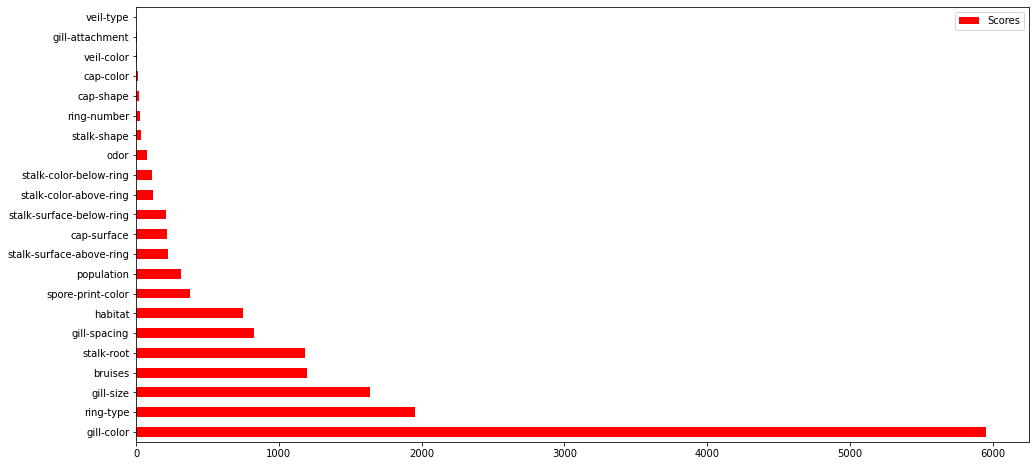

In [72]:
plt.figure(figsize=(18,12))
fs_df.plot(kind='barh',color='red',figsize=(16,8))

In [73]:
join_features = feature_multi.merge(top_kbest, on='features')

In [74]:
join_features

,features,fea_score,Scores
0,spore-print-color,0.333817,379.132729
1,gill-color,0.288780,5957.764469
2,ring-type,0.226931,1950.610146
3,stalk-surface-above-ring,0.186051,222.982400
4,stalk-surface-below-ring,0.185594,206.648180
5,stalk-color-above-ring,0.180439,119.792216
6,stalk-color-below-ring,0.169132,109.789410
7,gill-size,0.160372,1636.606833
8,population,0.140873,311.766736
9,bruises,0.137871,1194.277352


In [75]:
join_features['features'].values

array(['spore-print-color', 'gill-color', 'ring-type',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'gill-size',
       'population', 'bruises', 'habitat', 'stalk-root', 'gill-spacing'],
      dtype=object)

Splitting the data into train, test and validation sets.

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x1 = data_c.loc[:,['odor','spore-print-color', 'gill-color', 'ring-type',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'gill-size',
       'population', 'bruises', 'habitat', 'stalk-root', 'gill-spacing','cap-color','cap-surface','veil-color','stalk-shape']]

In [78]:
x1

,odor,spore-print-color,gill-color,ring-type,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,gill-size,population,bruises,habitat,stalk-root,gill-spacing,cap-color,cap-surface,veil-color,stalk-shape
0,6,2,4,4,2,2,7,7,1,3,1,5,3,0,4,2,2,0
1,0,3,4,4,2,2,7,7,0,2,1,1,2,0,9,2,2,0
2,3,3,5,4,2,2,7,7,0,2,1,3,2,0,8,2,2,0
3,6,2,5,4,2,2,7,7,1,3,1,5,3,0,8,3,2,0
4,5,3,4,0,2,2,7,7,0,0,0,1,3,1,3,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,5,0,11,4,2,2,5,5,0,1,0,2,0,0,4,2,1,0
8120,5,0,11,4,2,2,5,5,0,4,0,2,0,0,4,2,0,0
8121,5,0,5,4,2,2,5,5,0,1,0,2,0,0,4,2,1,0
8122,8,7,0,0,2,1,7,7,1,4,0,2,0,0,4,3,2,1


In [79]:
y1 = data_c['class']

In [80]:
x = data_c.drop(['class','veil-type'], axis=1)
y = data_c['class']

In [81]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [82]:
y

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x.values,y.values,test_size=0.4, random_state=30)

In [84]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1.values,y1.values,test_size=0.35,random_state=22)

In [85]:
x1_train.shape

(5280, 18)

In [86]:
y_train.shape

(4874,)

In [87]:
x_test.shape

(3250, 21)

In [88]:
y_test.shape

(3250,)

Hyper parameter tuning and model building

In [89]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [90]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [91]:
model_DT = DecisionTreeClassifier(random_state=30)
params = {'max_depth': range(1,20),'max_leaf_nodes':range(1,20),'min_samples_leaf':range(2,30),'min_samples_split':range(4,40),'criterion':['gini','entropy']}
random_DT = RandomizedSearchCV(model_DT,param_distributions=params, cv=5,scoring='accuracy',return_train_score=True,random_state=30)
random_DT.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=30),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 20),
                                        'max_leaf_nodes': range(1, 20),
                                        'min_samples_leaf': range(2, 30),
                                        'min_samples_split': range(4, 40)},
                   random_state=30, return_train_score=True,
                   scoring='accuracy')

In [92]:
model_DT1 = DecisionTreeClassifier(random_state=28)
params1 = {'max_depth': range(1,20),'max_leaf_nodes':range(1,20),'min_samples_leaf':range(2,30),'min_samples_split':range(4,40),'criterion':['gini','entropy']}
random_DT1 = RandomizedSearchCV(model_DT1,param_distributions=params1, cv=5,scoring='accuracy',return_train_score=True,random_state=22)
random_DT1.fit(x1_train,y1_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=28),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 20),
                                        'max_leaf_nodes': range(1, 20),
                                        'min_samples_leaf': range(2, 30),
                                        'min_samples_split': range(4, 40)},
                   random_state=22, return_train_score=True,
                   scoring='accuracy')

In [93]:
best_params_DT = random_DT.best_params_
best_params_DT

{'min_samples_split': 15,
 'min_samples_leaf': 14,
 'max_leaf_nodes': 18,
 'max_depth': 7,
 'criterion': 'entropy'}

In [94]:
best_params_DT1 = random_DT1.best_params_
best_params_DT1

{'min_samples_split': 8,
 'min_samples_leaf': 26,
 'max_leaf_nodes': 13,
 'max_depth': 10,
 'criterion': 'entropy'}

In [95]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(random_state=30)
params_rf = {'max_depth': range(1,20),'max_leaf_nodes':range(1,20),'min_samples_leaf':range(2,30),'min_samples_split':range(4,40),'criterion':['gini','entropy'],'n_estimators':range(10,300),'bootstrap':['True','False']}
random_rf = RandomizedSearchCV(model_RF,param_distributions=params_rf,random_state=30,cv=5,scoring='accuracy',return_train_score=True)
random_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 20),
                                        'max_leaf_nodes': range(1, 20),
                                        'min_samples_leaf': range(2, 30),
                                        'min_samples_split': range(4, 40),
                                        'n_estimators': range(10, 300)},
                   random_state=30, return_train_score=True,
                   scoring='accuracy')

In [96]:
best_params_rf= random_rf.best_params_
best_params_rf

{'n_estimators': 52,
 'min_samples_split': 24,
 'min_samples_leaf': 12,
 'max_leaf_nodes': 19,
 'max_depth': 14,
 'criterion': 'gini',
 'bootstrap': 'True'}

In [97]:
from sklearn.svm import SVC
model_SVC = SVC()
params_svc = {'kernel':['rbf','linear','sigmoid','poly'],'C':[0.1,1,10,100,1000],'gamma':[0.1,1,10,100]}
random_svc = RandomizedSearchCV(model_SVC,param_distributions=params_svc,scoring='accuracy',cv=5,return_train_score=True,random_state=30)
random_svc.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [0.1, 1, 10, 100],
                                        'kernel': ['rbf', 'linear', 'sigmoid',
                                                   'poly']},
                   random_state=30, return_train_score=True,
                   scoring='accuracy')

In [98]:
best_params_svc = random_svc.best_params_
best_params_svc

{'kernel': 'poly', 'gamma': 10, 'C': 10}

In [99]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
model_NB = GaussianNB(var_smoothing=0.009)
model_CNB = CategoricalNB(alpha=1)
model_NB.fit(x_train,y_train)
model_CNB.fit(x_train,y_train)
y_pred_nb_train = model_NB.predict(x_train)
y_pred_nb_test = model_NB.predict(x_test)
accu_nb_train = np.mean(y_train==y_pred_nb_train)*100
accu_nb_test = np.mean(y_test==y_pred_nb_test)*100
print('accu_train_nb:%.3f' % accu_nb_train, '\n', 'accu_test_nb: %.3f' % accu_nb_test)

accu_train_nb:90.644 
 accu_test_nb: 89.938


In [100]:
cm_nb = pd.DataFrame(confusion_matrix(y_test,y_pred_nb_test))
print(classification_report(y_test,y_pred_nb_test))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1554
           1       0.85      0.97      0.91      1696

    accuracy                           0.90      3250
   macro avg       0.91      0.90      0.90      3250
weighted avg       0.91      0.90      0.90      3250



In [101]:
!pip install pretty_confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 156 kB 8.7 MB/s 
     |████████████████████████████████| 11.2 MB 62.6 MB/s 
     |████████████████████████████████| 73 kB 1.6 MB/s 
     |████████████████████████████████| 199 kB 45.9 MB/s 
     |████████████████████████████████| 103 kB 66.2 MB/s 
     |████████████████████████████████| 843 kB 47.9 MB/s 
     |████████████████████████████████| 68 kB 7.6 MB/s 
     |████████████████████████████████| 41 kB 689 kB/s 
     |████████████████████████████████| 957 kB 54.2 MB/s 
     |████████████████████████████████| 8.8 MB 54.2 MB/s 
     |████████████████████████████████| 98 kB 8.7 MB/s 
     |████████████████████████████████| 468 kB 56.7 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=7dbc2b26570acbfe683cbfb8ab549eb4fb22c0ea05c68b6899675e01a577f131
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e

In [102]:
from pretty_confusion_matrix import pp_matrix

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

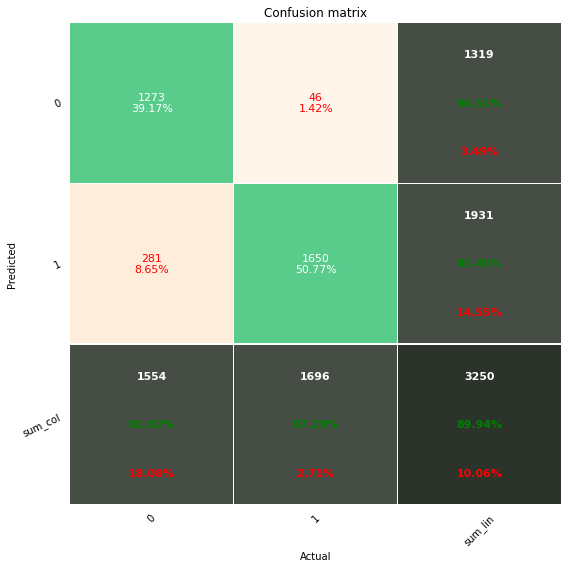

In [103]:
pp_matrix(cm_nb, cmap='Oranges')

In [104]:
y_pred_cnb_train = model_CNB.predict(x_train)
y_pred_cnb_test = model_CNB.predict(x_test)
accu_cnb_train = np.mean(y_train==y_pred_cnb_train)*100
accu_cnb_test = np.mean(y_test==y_pred_cnb_test)*100
print('accu_train_cnb:%.3f' % accu_cnb_train, '\n', 'accu_test_cnb: %.3f' % accu_cnb_test)

accu_train_cnb:94.686 
 accu_test_cnb: 94.462


/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

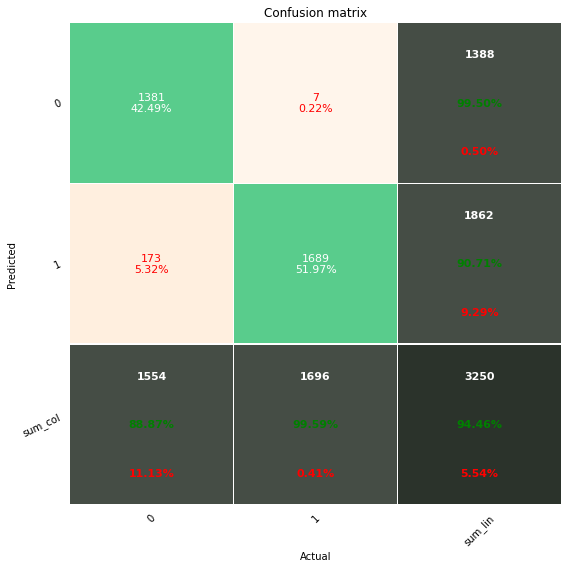

In [105]:
cm_cnb = pd.DataFrame(confusion_matrix(y_test,y_pred_cnb_test))
pp_matrix(cm_cnb, cmap='Oranges')

In [106]:
print(classification_report(y_test,y_pred_cnb_test))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1554
           1       0.91      1.00      0.95      1696

    accuracy                           0.94      3250
   macro avg       0.95      0.94      0.94      3250
weighted avg       0.95      0.94      0.94      3250



In [107]:
model_NB1 = GaussianNB(var_smoothing=0.007)
model_CNB1 = CategoricalNB(alpha=1.1)
model_NB1.fit(x1_train,y1_train)
model_CNB1.fit(x1_train,y1_train)
y_pred_nb1_train = model_NB1.predict(x1_train)
y_pred_nb1_test = model_NB1.predict(x1_test)
accu_nb1_train = np.mean(y1_train==y_pred_nb1_train)*100
accu_nb1_test = np.mean(y1_test==y_pred_nb1_test)*100
print('accu_train_nb1:%.3f' % accu_nb1_train, '\n', 'accu_test_nb1: %.3f' % accu_nb1_test)

accu_train_nb1:89.735 
 accu_test_nb1: 88.748


In [108]:
y_pred_cnb1_train = model_CNB1.predict(x1_train)
y_pred_cnb1_test = model_CNB1.predict(x1_test)
accu_cnb1_train = np.mean(y1_train==y_pred_cnb1_train)*100
accu_cnb1_test = np.mean(y1_test==y_pred_cnb1_test)*100
print('accu_train_cnb1:%.3f' % accu_cnb1_train, '\n', 'accu_test_cnb1: %.3f' % accu_cnb1_test)

accu_train_cnb1:94.962 
 accu_test_cnb1: 94.163


In [109]:
best_params_DT

{'min_samples_split': 15,
 'min_samples_leaf': 14,
 'max_leaf_nodes': 18,
 'max_depth': 7,
 'criterion': 'entropy'}

In [110]:
model_cart = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=10,min_samples_split=10,max_depth=5,max_leaf_nodes=18)
model_cart.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=18,
                       min_samples_leaf=10, min_samples_split=10)

In [111]:
y_pred_cart_train = model_cart.predict(x_train)

In [112]:
y_pred_cart_train

array([0, 0, 0, ..., 0, 0, 0])

[Text(0.3076923076923077, 0.9166666666666666, 'gill-color <= 0.5\nentropy = 0.999\nsamples = 4874\nvalue = [2362, 2512]\nclass = 1'),
 Text(0.23076923076923078, 0.75, 'entropy = 0.0\nsamples = 1030\nvalue = [1030, 0]\nclass = 0'),
 Text(0.38461538461538464, 0.75, 'spore-print-color <= 1.5\nentropy = 0.931\nsamples = 3844\nvalue = [1332, 2512]\nclass = 1'),
 Text(0.15384615384615385, 0.5833333333333334, 'stalk-root <= 0.5\nentropy = 0.307\nsamples = 1036\nvalue = [979, 57]\nclass = 0'),
 Text(0.07692307692307693, 0.4166666666666667, 'entropy = 0.0\nsamples = 57\nvalue = [0, 57]\nclass = 1'),
 Text(0.23076923076923078, 0.4166666666666667, 'entropy = 0.0\nsamples = 979\nvalue = [979, 0]\nclass = 0'),
 Text(0.6153846153846154, 0.5833333333333334, 'gill-size <= 0.5\nentropy = 0.546\nsamples = 2808\nvalue = [353, 2455]\nclass = 1'),
 Text(0.38461538461538464, 0.4166666666666667, 'spore-print-color <= 4.5\nentropy = 0.175\nsamples = 2363\nvalue = [62, 2301]\nclass = 1'),
 Text(0.3076923076923

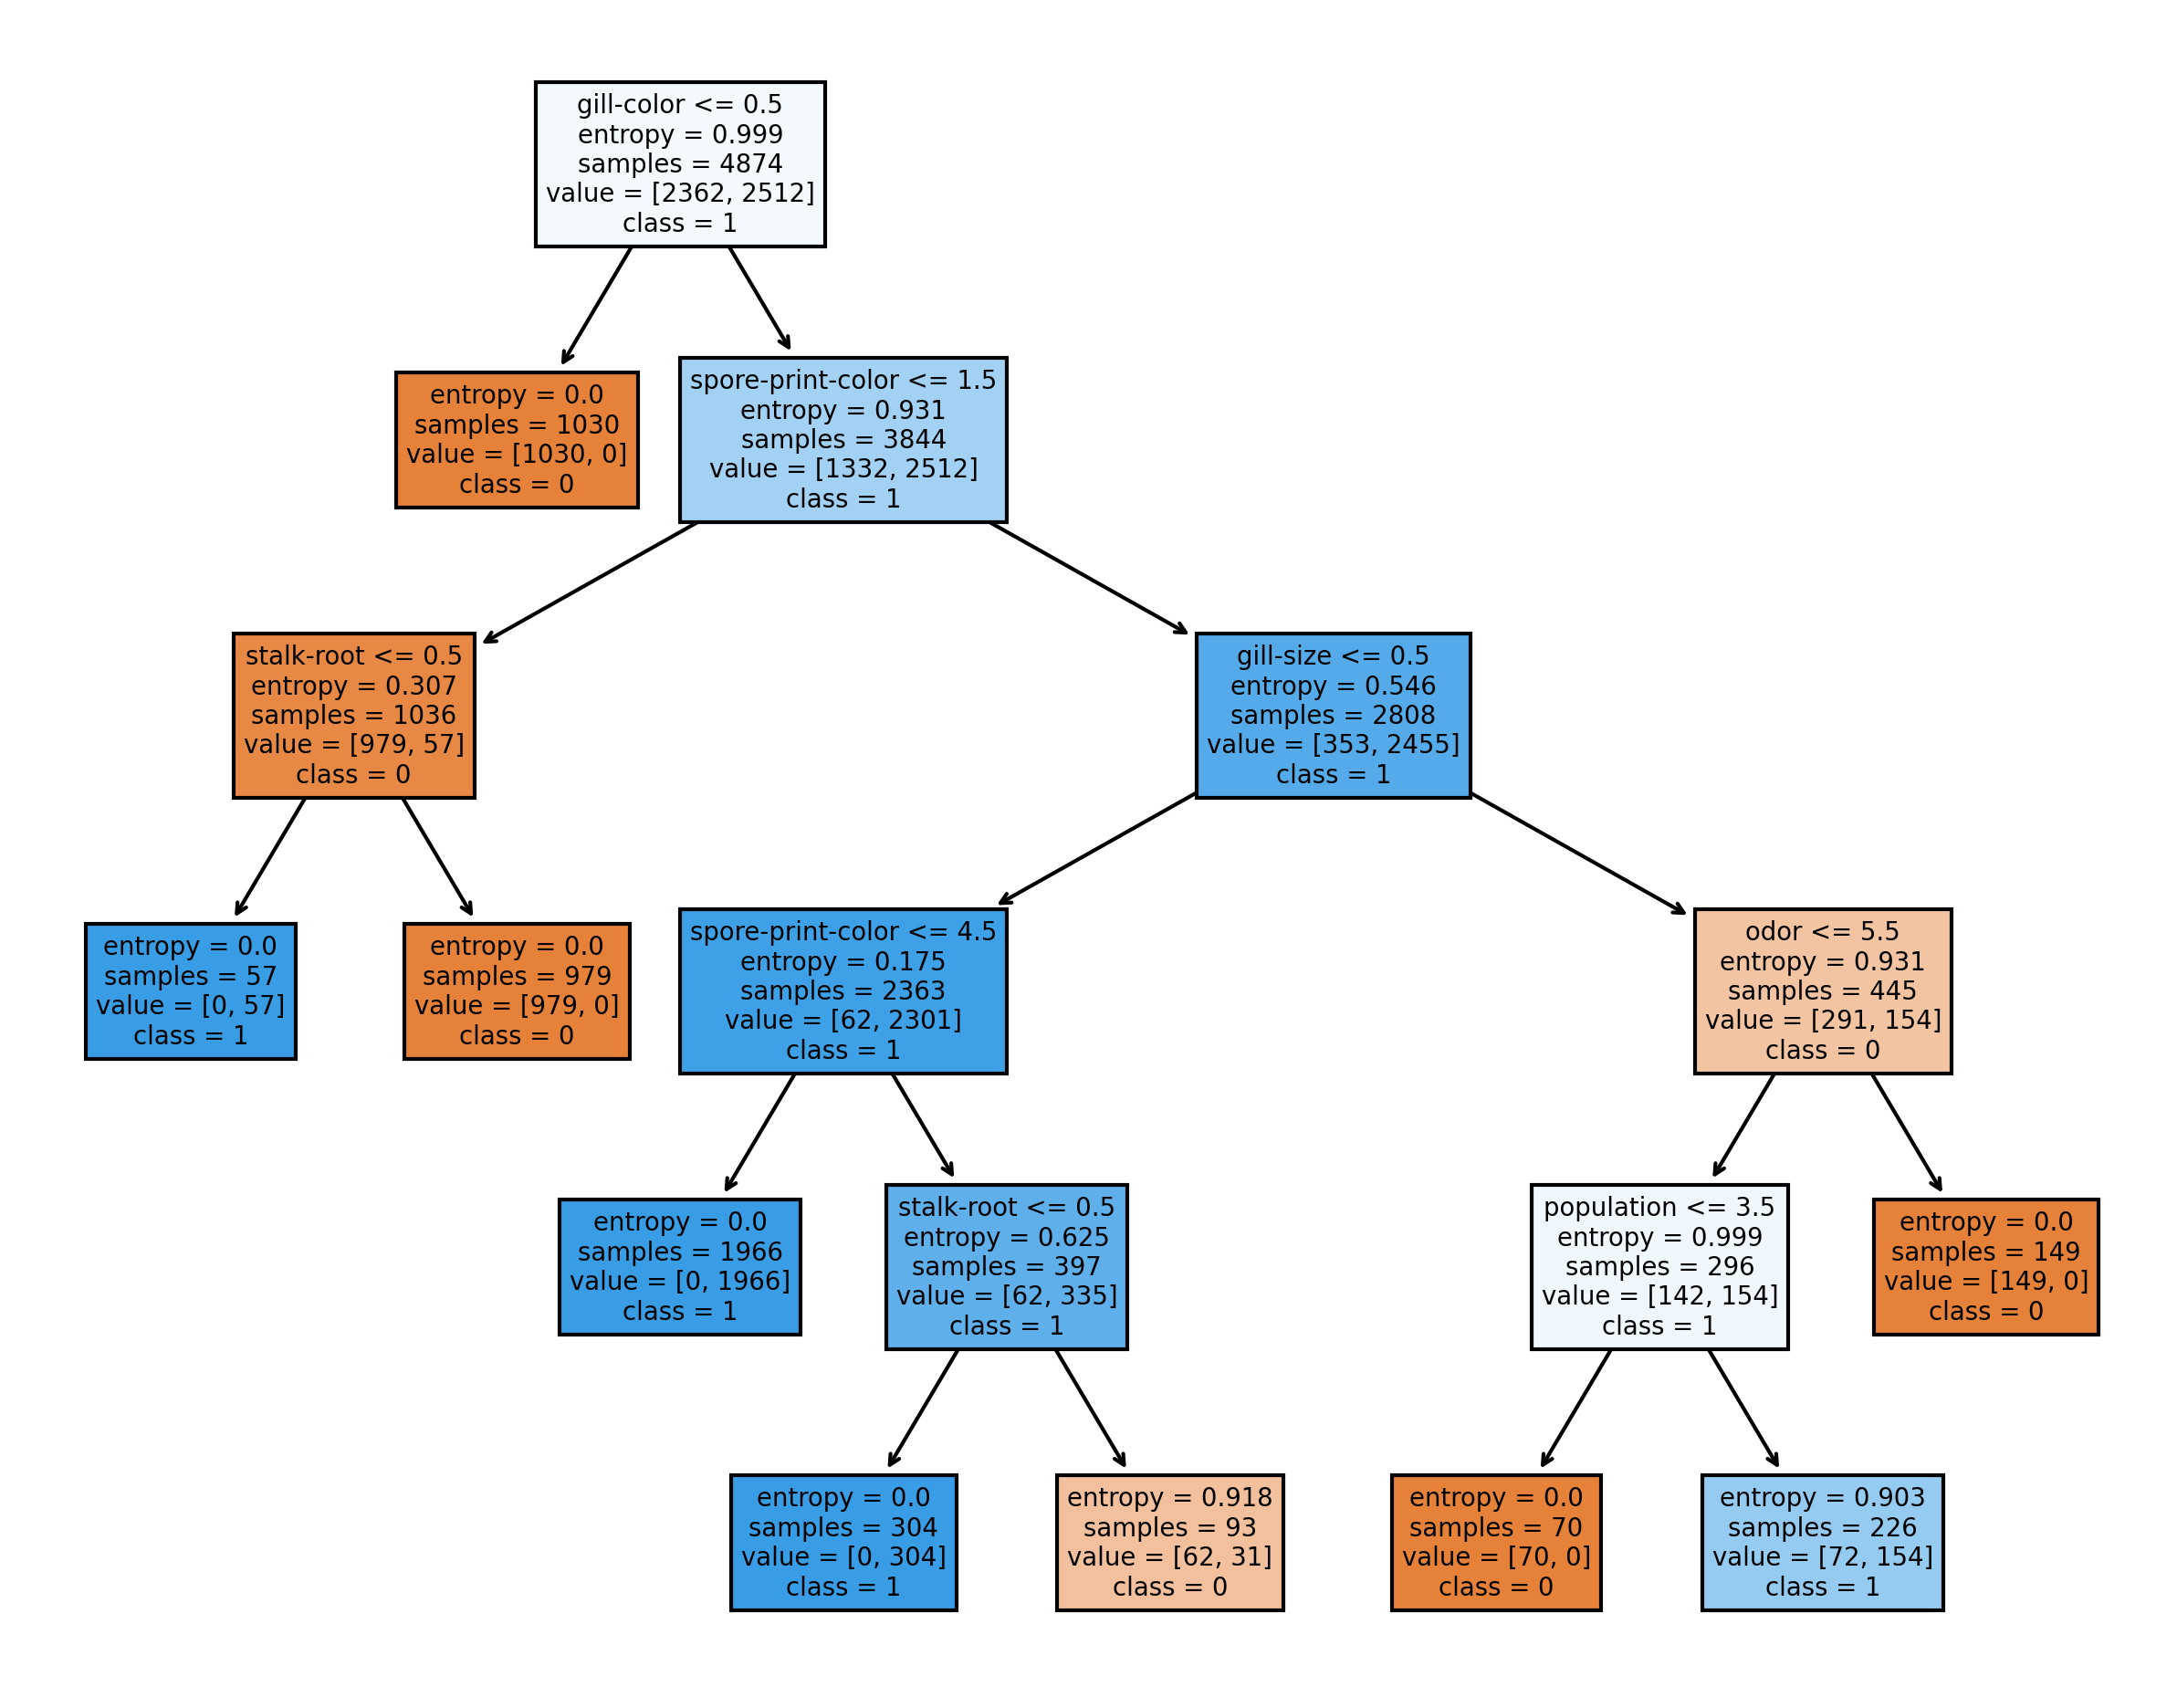

In [113]:
fn = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring','veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
cn = ['0','1']
fig,axes = plt.subplots(ncols=1,nrows=1,figsize=(10,8),dpi=300)
plot_tree(model_cart,feature_names=fn, class_names=cn,filled=True)


In [114]:
len(y_pred_cart_train)

4874

In [115]:
len(y_train)

4874

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
accu_DT_train = accuracy_score(y_train,y_pred_cart_train)
accu_DT_train*100

97.88674599917931

In [118]:
y_pred_DT = model_cart.predict(x_test)

In [119]:
accu_DT_test = np.mean(y_test==y_pred_DT)*100

In [120]:
accu_DT_test

97.75384615384615

In [121]:
from sklearn.model_selection import cross_val_score
cv_dt = cross_val_score(model_cart, x_train, y_train, scoring='accuracy')
cv_dt.mean()*100

97.9483388616859

In [122]:
cls_cart = classification_report(y_pred_DT, y_test)

In [123]:
print(cls_cart)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1515
           1       0.99      0.97      0.98      1735

    accuracy                           0.98      3250
   macro avg       0.98      0.98      0.98      3250
weighted avg       0.98      0.98      0.98      3250



In [124]:
cm_dt = confusion_matrix(y_test, y_pred_DT)

In [125]:
cm_dt_df = pd.DataFrame(cm_dt)

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

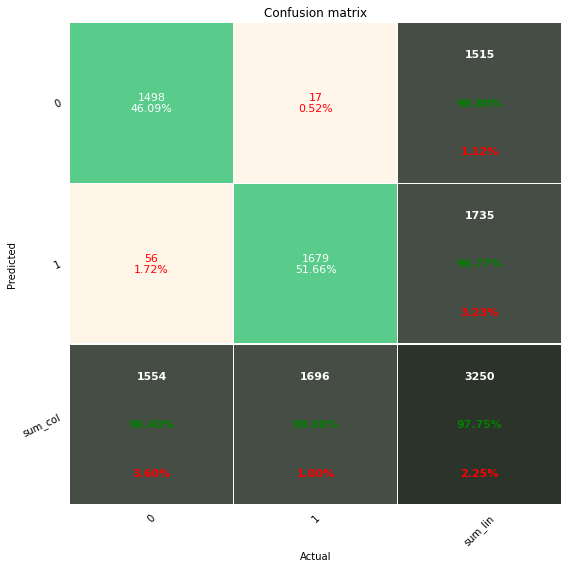

In [126]:
pp_matrix(cm_dt_df, cmap='Oranges')

In [127]:
random_DT1.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 26,
 'max_leaf_nodes': 13,
 'max_depth': 10,
 'criterion': 'entropy'}

In [128]:
model_cart1 = DecisionTreeClassifier(criterion='entropy',max_depth=8,max_leaf_nodes=11,min_samples_leaf=20,min_samples_split=8).fit(x1_train,y1_train)

In [129]:
pred_y1_dtrain = model_cart1.predict(x1_train)
pred_y1_dtest = model_cart1.predict(x1_test)

In [130]:
acc_train_dtrain = accuracy_score(y1_train,pred_y1_dtrain)
accu_test_dtest = accuracy_score(y1_test,pred_y1_dtest)

In [131]:
acc_train_dtrain

0.9668560606060606

In [132]:
accu_test_dtest

0.9644866385372715

In [133]:
random_rf.best_params_

{'n_estimators': 52,
 'min_samples_split': 24,
 'min_samples_leaf': 12,
 'max_leaf_nodes': 19,
 'max_depth': 14,
 'criterion': 'gini',
 'bootstrap': 'True'}

In [134]:
model_ranf = RandomForestClassifier(n_estimators=46, min_samples_split=16,max_depth=6,criterion='gini',bootstrap=True,min_samples_leaf=8,max_leaf_nodes=6, random_state=30)

In [135]:
model_ranf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_leaf_nodes=6, min_samples_leaf=8,
                       min_samples_split=16, n_estimators=46, random_state=30)

In [136]:
y_pred_train_rf = model_ranf.predict(x_train)
accu_rf_train = np.mean(y_train==y_pred_train_rf)*100
accu_rf_train

96.90192860073861

In [137]:
y_pred_rf = model_ranf.predict(x_test)
accu_rf_test = np.mean(y_test==y_pred_rf)*100

In [138]:
accu_rf_test

96.39999999999999

[Text(0.4444444444444444, 0.9, 'stalk-surface-below-ring <= 1.5\ngini = 0.5\nsamples = 3088\nvalue = [2384, 2490]\nclass = 1'),
 Text(0.2222222222222222, 0.7, 'gill-spacing <= 0.5\ngini = 0.317\nsamples = 1139\nvalue = [1443, 356]\nclass = 0'),
 Text(0.1111111111111111, 0.5, 'gini = 0.044\nsamples = 938\nvalue = [1443, 33]\nclass = 0'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 201\nvalue = [0, 323]\nclass = 1'),
 Text(0.6666666666666666, 0.7, 'stalk-color-above-ring <= 5.5\ngini = 0.425\nsamples = 1949\nvalue = [941, 2134]\nclass = 1'),
 Text(0.5555555555555556, 0.5, 'gini = 0.065\nsamples = 350\nvalue = [19, 544]\nclass = 1'),
 Text(0.7777777777777778, 0.5, 'stalk-root <= 0.5\ngini = 0.465\nsamples = 1599\nvalue = [922, 1590]\nclass = 1'),
 Text(0.6666666666666666, 0.3, 'gill-size <= 0.5\ngini = 0.304\nsamples = 411\nvalue = [526, 121]\nclass = 0'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 77\nvalue = [0, 121]\nclass = 1'),
 Text(0.7777777777777778, 0.1, 'gin

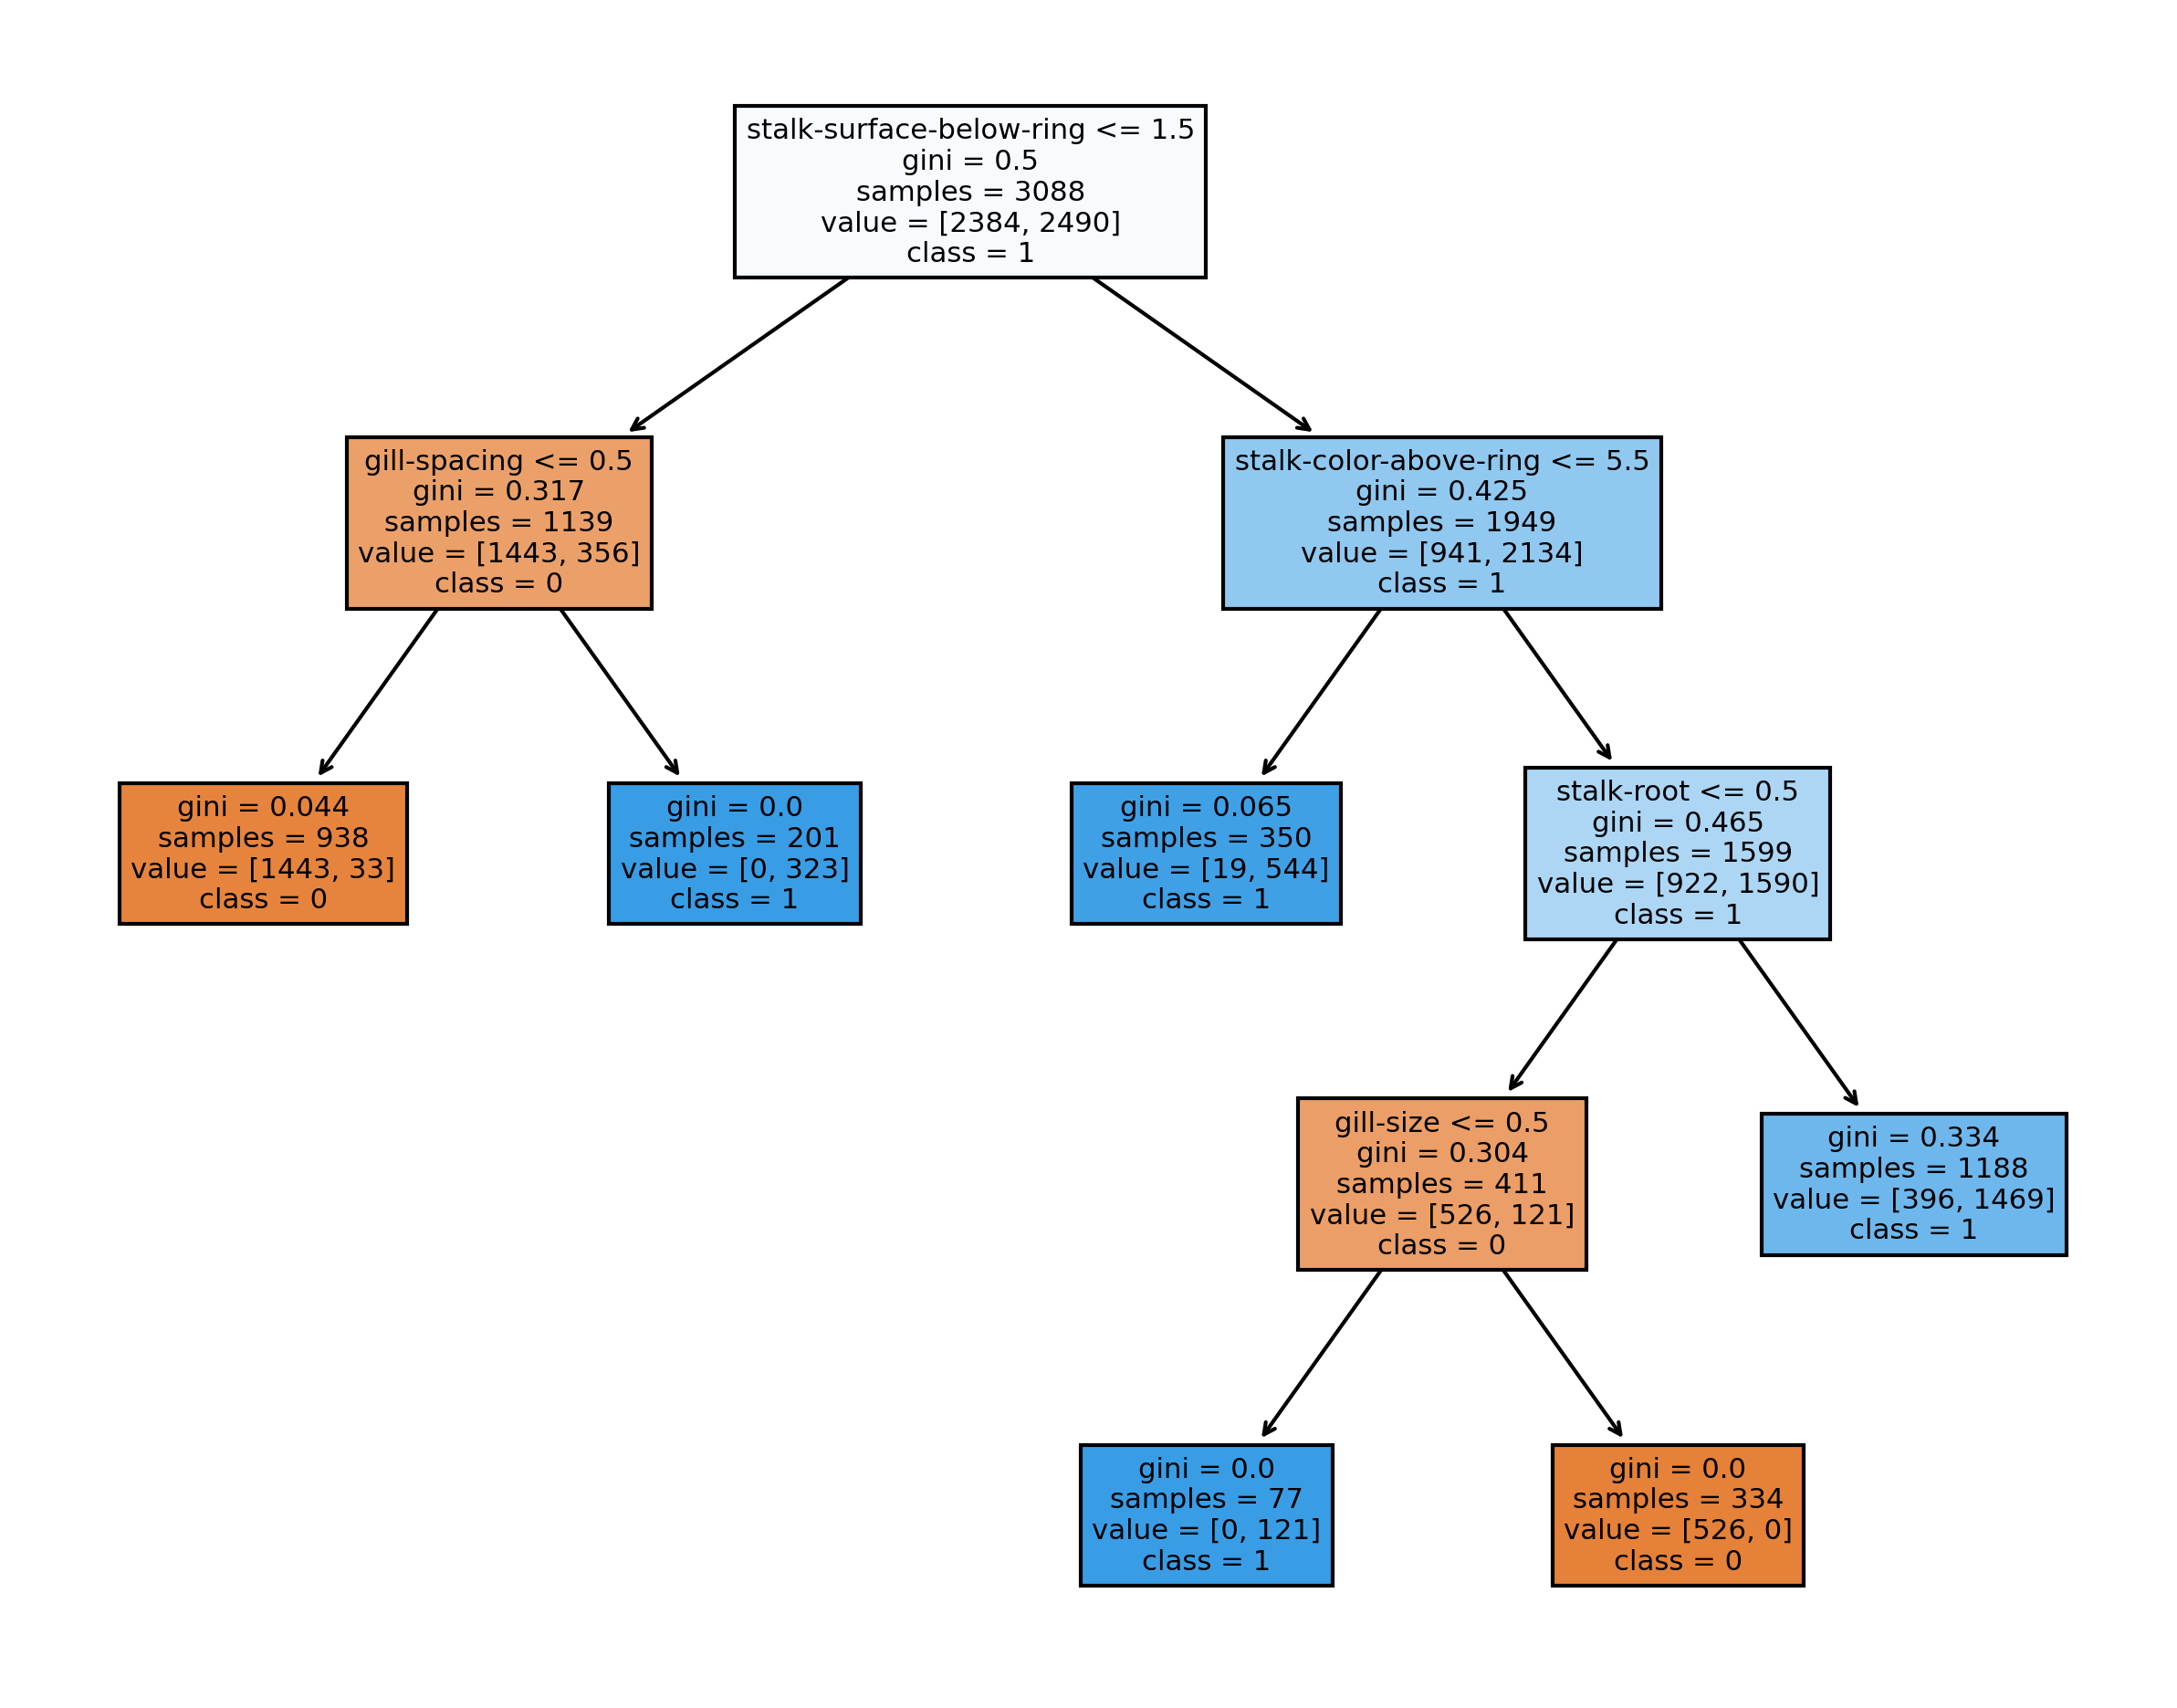

In [139]:
fn = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
cn = ['0','1']
fig,axes = plt.subplots(ncols=1,nrows=1,figsize=(10,8),dpi=300)
plot_tree(model_ranf.estimators_[7],feature_names=fn, class_names=cn,filled=True)

In [140]:
cm_rf = pd.DataFrame(confusion_matrix(y_test,y_pred_rf))

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

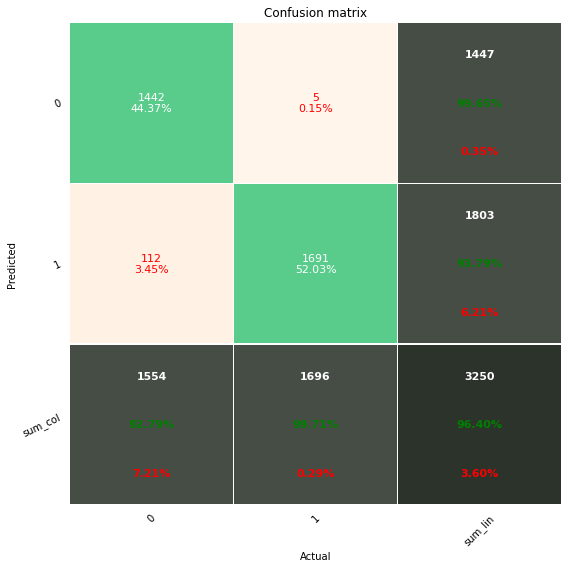

In [141]:
pp_matrix(cm_rf, cmap='Oranges')


In [142]:
cls_rf = classification_report(y_test,y_pred_rf)

In [143]:
print(cls_rf)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1554
           1       0.94      1.00      0.97      1696

    accuracy                           0.96      3250
   macro avg       0.97      0.96      0.96      3250
weighted avg       0.97      0.96      0.96      3250



In [144]:
random_svc.best_params_

{'kernel': 'poly', 'gamma': 10, 'C': 10}

In [145]:
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVC

In [146]:
model_svc1 = LinearSVC(penalty='l2',C=0.0015)

In [147]:
model_svc1.fit(x1_train,y1_train)

LinearSVC(C=0.0015)

In [148]:
svc1_train = model_svc1.predict(x1_train)
svc1_test = model_svc1.predict(x1_test)
ac1_svc1_tr = accuracy_score(y1_train, svc1_train)
ac1_svc1_te = accuracy_score(y1_test,svc1_test)

In [149]:
print(ac1_svc1_tr, ac1_svc1_te)

0.915340909090909 0.9138537271448663


In [150]:
model_svc1.fit(x_train,y_train)

LinearSVC(C=0.0015)

In [151]:
svc_train = model_svc1.predict(x_train)
svc_test = model_svc1.predict(x_test)
ac1_svc_tr = accuracy_score(y_train, svc_train)
ac1_svc_te = accuracy_score(y_test,svc_test)

In [152]:
print(ac1_svc_tr, ac1_svc_te)

0.9167008617152236 0.9153846153846154


In [153]:
model_svc = SVC(kernel='linear',gamma=10,C=1,probability=True)

In [154]:
model_svc.fit(x_train,y_train)
y_pred_svc_train = model_svc.predict(x_train)
y_pred_svc_test = model_svc.predict(x_test)
accu_svc_train = np.mean(y_train==y_pred_svc_train)
accu_svc_test = np.mean(y_test==y_pred_svc_test)
print('accu_train_svc:%.3f' % accu_svc_train, '\n', 'accu_test_svc: %.3f' % accu_svc_test)

accu_train_svc:0.982 
 accu_test_svc: 0.978


/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

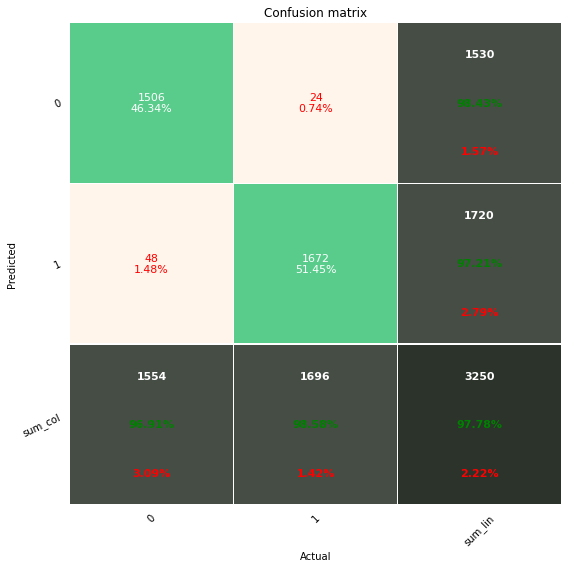

In [155]:
cm_svc = pd.DataFrame(confusion_matrix(y_test,y_pred_svc_test))
pp_matrix(cm_svc, cmap='Oranges')

In [156]:
print(classification_report(y_test,y_pred_svc_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1554
           1       0.97      0.99      0.98      1696

    accuracy                           0.98      3250
   macro avg       0.98      0.98      0.98      3250
weighted avg       0.98      0.98      0.98      3250



KNN algorithm

In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
k_no = range(1,16)
accuracies_knn = []
for i in k_no:
  accuracy_knn = cross_val_score(KNeighborsClassifier(n_neighbors=i),x_train,y_train,cv=6,scoring='accuracy')
  accuracies_knn.append(accuracy_knn.mean())


In [159]:
accuracies_knn

[0.9997947454844006,
 0.9985634708563834,
 0.9977432101907225,
 0.9975379556751233,
 0.9971271941783457,
 0.9971271941783457,
 0.996102436393822,
 0.9967171900783046,
 0.9950764162814041,
 0.9958966769470651,
 0.994460905200185,
 0.9948714142313836,
 0.9932301355033255,
 0.9928191215409691,
 0.9907678387128698]

Text(0.5, 1.0, 'Kneighbors vs cv_accuracy')

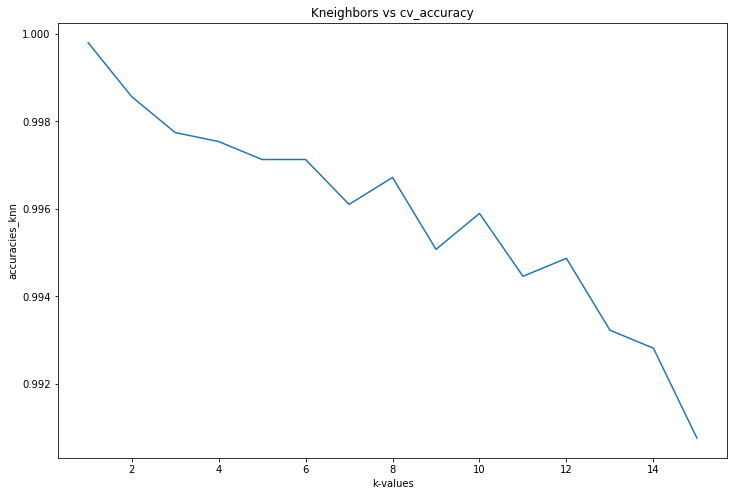

In [160]:
plt.figure(figsize=(12,8))
plt.plot(k_no, accuracies_knn)
plt.xlabel('k-values')
plt.ylabel('accuracies_knn')
plt.title('Kneighbors vs cv_accuracy')

All the k-values have good accuracy

In [161]:
model_KNN = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

In [162]:
model_KNN.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [163]:
y_pred_knntr = model_KNN.predict(x_train)
y_pred_knnte = model_KNN.predict(x_test)
accu_knn_train = np.mean(y_train==y_pred_knntr)
accu_knn_test = np.mean(y_test==y_pred_knnte)


In [164]:
accu_knn_train

0.9983586376692655

In [165]:
accu_knn_test

0.9972307692307693

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

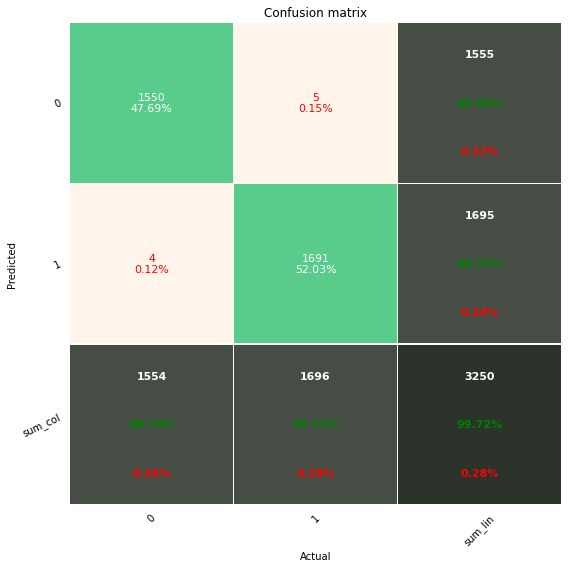

In [166]:
cm_knn = pd.DataFrame(confusion_matrix(y_test,y_pred_knnte))
pp_matrix(cm_knn, cmap='Oranges',annot=True)

In [167]:
print(classification_report(y_test, y_pred_knnte))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1554
           1       1.00      1.00      1.00      1696

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



In [168]:
cv_knn_accu = cross_val_score(model_KNN, x_train, y_train, cv=6, scoring='accuracy')
cv_knn_accu.mean()

0.9958966769470651

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
model_lr = LogisticRegression(penalty='l2', C=0.1, max_iter=250)

In [171]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [172]:
for i in data.columns:
  if len(data[i].unique())==2:
    print(i)

class
bruises
gill-attachment
gill-spacing
gill-size
stalk-shape


In [173]:
data_oneho= data.copy()

In [174]:
df_onehot = pd.get_dummies(data=data_oneho, columns=['class'
,'bruises'
,'gill-attachment'
,'gill-spacing'
,'gill-size'
,'stalk-shape'], drop_first=True)

In [175]:
df_onehot

,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,...,ring-type,spore-print-color,population,habitat,class_p,bruises_t,gill-attachment_f,gill-spacing_w,gill-size_n,stalk-shape_t
0,x,s,n,p,k,e,s,s,w,w,...,p,k,s,u,1,1,1,0,1,0
1,x,s,y,a,k,c,s,s,w,w,...,p,n,n,g,0,1,1,0,0,0
2,b,s,w,l,n,c,s,s,w,w,...,p,n,n,m,0,1,1,0,0,0
3,x,y,w,p,n,e,s,s,w,w,...,p,k,s,u,1,1,1,0,1,0
4,x,s,g,n,k,e,s,s,w,w,...,e,n,a,g,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,n,y,?,s,s,o,o,...,p,b,c,l,0,0,0,0,0,0
8120,x,s,n,n,y,?,s,s,o,o,...,p,b,v,l,0,0,0,0,0,0
8121,f,s,n,n,n,?,s,s,o,o,...,p,b,c,l,0,0,0,0,0,0
8122,k,y,n,y,b,?,s,k,w,w,...,e,w,v,l,1,0,1,0,1,1


In [176]:
df_onehot1 = pd.get_dummies(data=df_onehot, columns=['cap-shape', 'cap-surface', 'cap-color', 'odor'
       , 'gill-color','stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])

In [177]:
df_onehot1

,veil-type,class_p,bruises_t,gill-attachment_f,gill-spacing_w,gill-size_n,stalk-shape_t,cap-shape_b,cap-shape_c,cap-shape_f,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,1,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,p,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,p,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,p,1,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,p,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,p,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,p,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,p,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,p,1,0,1,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [178]:
df_onehot2 = pd.get_dummies(data=df_onehot1, columns=['veil-type'])

In [179]:
df_onehot2

,class_p,bruises_t,gill-attachment_f,gill-spacing_w,gill-size_n,stalk-shape_t,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,veil-type_p
0,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
8120,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
8121,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
8122,1,0,1,0,1,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1


In [180]:
x2 = df_onehot2.drop(['class_p','veil-type_p'],axis=1)
y2 = df_onehot2['class_p']

In [181]:
x2.shape

(8124, 111)

In [182]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2.values,y2.values,test_size=0.33,random_state=30)

In [183]:
model_lr.fit(x2_train,y2_train)

LogisticRegression(C=0.1, max_iter=250)

In [184]:
y_pred_lr_train = model_lr.predict(x2_train)
y_pred_lr_test = model_lr.predict(x2_test)
accu_lr_tr = np.mean(y2_train==y_pred_lr_train)
accu_lr_te = np.mean(y2_test==y_pred_lr_test)


In [185]:
accu_lr_tr

0.9985302223038766

In [186]:
accu_lr_te

0.9985080193957478

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

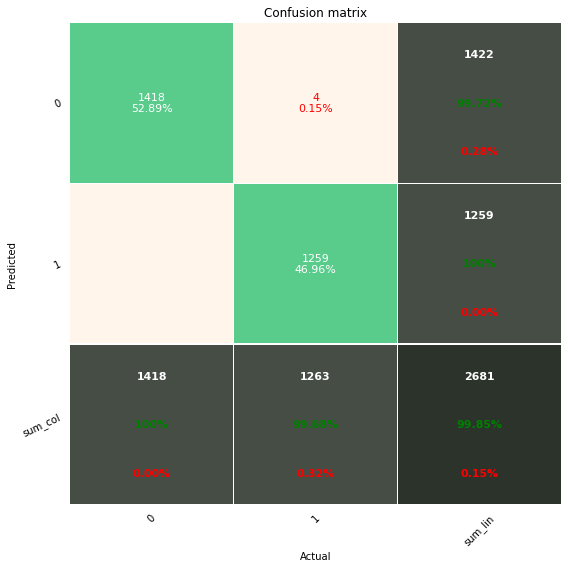

In [187]:
cm_lr = pd.DataFrame(confusion_matrix(y2_test,y_pred_lr_test))
pp_matrix(cm_lr, cmap='Oranges')

In [188]:
print(classification_report(y2_test,y_pred_lr_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1418
           1       1.00      1.00      1.00      1263

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



Let us check the roc curves for the models.

In [189]:
accu_diction = {'Models':['KNN','Logistic regression', 'Naive Bayes','Categorical Naive Bayes','SVC','Decision Tree','Random forest','SVC_regularized'],'Test_accuracies':[accu_knn_test*100,accu_lr_te*100,accu_nb_test,accu_cnb_test,accu_svc_test*100,accu_DT_test,accu_rf_test,ac1_svc_te*100]}

In [190]:
accuracy_df = pd.DataFrame(accu_diction)

In [191]:
accuracy_df

,Models,Test_accuracies
0,KNN,99.723077
1,Logistic regression,99.850802
2,Naive Bayes,89.938462
3,Categorical Naive Bayes,94.461538
4,SVC,97.784615
5,Decision Tree,97.753846
6,Random forest,96.400000
7,SVC_regularized,91.538462


In [192]:
from sklearn.metrics import roc_curve, roc_auc_score

In [193]:
fpr,tpr,thresholds = roc_curve(y_test, model_cart.predict_proba(x_test)[:,1])
fpr1,tpr1,thresholds1 = roc_curve(y_test, model_ranf.predict_proba(x_test)[:,1])
fpr2,tpr2,thresholds2 = roc_curve(y_test, model_NB.predict_proba(x_test)[:,1])
fpr3,tpr3,thresholds3 = roc_curve(y_test, model_CNB.predict_proba(x_test)[:,1])
fpr4,tpr4,thresholds4 = roc_curve(y_test, model_svc.predict_proba(x_test)[:,1])
fpr5,tpr5,thresholds5 = roc_curve(y2_test, model_lr.predict_proba(x2_test)[:,1])
fpr6,tpr6,thresholds6 = roc_curve(y_test, model_KNN.predict_proba(x_test)[:,1])

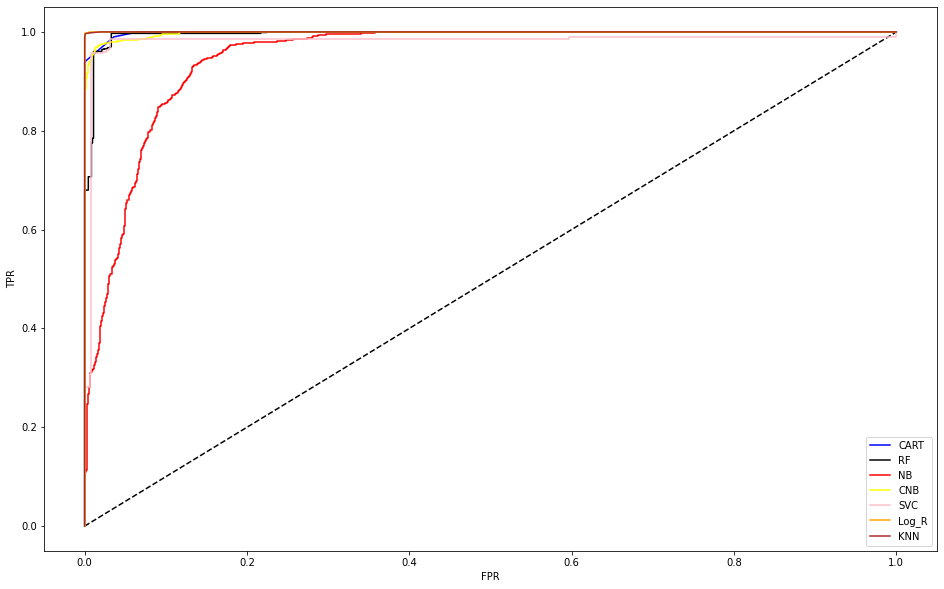

In [194]:
plt.figure(figsize=(16,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='CART',color='blue')
plt.plot(fpr1,tpr1,label='RF',color='black')
plt.plot(fpr2,tpr2,label='NB',color='red')
plt.plot(fpr3,tpr3,label='CNB',color='yellow')
plt.plot(fpr4,tpr4,label='SVC',color='pink')
plt.plot(fpr5,tpr5,label='Log_R',color='orange')
plt.plot(fpr6,tpr6,label='KNN',color='brown')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [195]:
auc_cart = roc_auc_score(y_test, model_cart.predict_proba(x_test)[:,1])

In [196]:
auc_cart

0.9985767860178237

In [197]:
auc_rf = roc_auc_score(y_test, model_ranf.predict_proba(x_test)[:,1])
auc_nb = roc_auc_score(y_test, model_NB.predict_proba(x_test)[:,1])
auc_cnb = roc_auc_score(y_test, model_CNB.predict_proba(x_test)[:,1])
auc_svc = roc_auc_score(y_test, model_svc.predict_proba(x_test)[:,1])
auc_knn = roc_auc_score(y_test, model_KNN.predict_proba(x_test)[:,1])
auc_lr = roc_auc_score(y2_test, model_lr.predict_proba(x2_test)[:,1])


In [198]:
auc_scores= pd.DataFrame({'Models':['KNN','Logistic regression', 'Naive Bayes','Categorical Naive Bayes','SVC','Decision Tree','Random forest'],'AUC_score':[auc_knn,auc_lr,auc_nb,auc_cnb,auc_svc,auc_cart,auc_rf]})

In [199]:
auc_scores

,Models,AUC_score
0,KNN,0.999966
1,Logistic regression,0.999983
2,Naive Bayes,0.951142
3,Categorical Naive Bayes,0.997615
4,SVC,0.980830
5,Decision Tree,0.998577
6,Random forest,0.995518


In [200]:
auc_scores['AUC_score'] = auc_scores['AUC_score']*100

In [201]:
auc_scores

,Models,AUC_score
0,KNN,99.996585
1,Logistic regression,99.998269
2,Naive Bayes,95.114176
3,Categorical Naive Bayes,99.761533
4,SVC,98.083006
5,Decision Tree,99.857679
6,Random forest,99.551769
